In [1]:
import tensorflow as tf

print(f'tensorflow version {tf.__version__}')

from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy import * 

import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

tensorflow version 2.9.1


# extract report smt



In [2]:
import pickle
import os

name_smt = []
confs_smt = []
resutl_smt= []

#extract names
names_smt_path = 'smt/names'
for root, dirs, files in os.walk(names_smt_path, topdown=False):
    for name in files:
        print(os.path.join(root, name))
        file_name = os.path.join(root, name)
        open_file = open(file_name, "rb")
        loaded_list_names = pickle.load(open_file)
        name_smt.append(loaded_list_names)
        open_file.close()
        print("--------done---------")
        
#extract confs
confs_smt_path = 'smt/confs'
for root, dirs, files in os.walk(confs_smt_path, topdown=False):
    for name in files:
        print(os.path.join(root, name))
        file_name = os.path.join(root, name)
        open_file = open(file_name, "rb")
        loaded_list_names = pickle.load(open_file)
        confs_smt.append(loaded_list_names)
        open_file.close()
        print("--------done---------")
        
        
#extract result
result_smt_path = 'smt/result'
for root, dirs, files in os.walk(result_smt_path, topdown=False):
    for name in files:
        print(os.path.join(root, name))
        file_name = os.path.join(root, name)
        open_file = open(file_name, "rb")
        loaded_list_names = pickle.load(open_file)
        resutl_smt.append(loaded_list_names)
        open_file.close()
        print("--------done---------")

smt/names/names_smotev1.pkl
--------done---------
smt/names/names_smotev2.pkl
--------done---------
smt/confs/confs_smotev1.pkl
--------done---------
smt/confs/confs_smotev2.pkl
--------done---------
smt/result/results_smotev1.pkl
--------done---------
smt/result/results_smotev2.pkl
--------done---------


In [3]:
list_name_smt = []

for items in name_smt[0]:
    list_name_smt.append(items)
    
for items in name_smt[1]:
    list_name_smt.append(items)
    
list_confs_smt = []

for items in confs_smt[0]:
    list_confs_smt.append(items)
    
for items in confs_smt[1]:
    list_confs_smt.append(items)
    
list_results_smt = []

for items in resutl_smt[0]:
    list_results_smt.append(items)
    
for items in resutl_smt[1]:
    list_results_smt.append(items)

In [4]:
len(list_results_smt)

72

In [5]:
import numpy as np

matrix_smt = [[j for j in range(3)] for i in range(72)]

In [6]:
for i in range(0,72):
    matrix_smt[i][0]= list_name_smt[i]
    matrix_smt[i][1]= list_confs_smt[i]
    matrix_smt[i][2]= list_results_smt[i]
    
lns = list_name_smt
lcs = list_confs_smt
lrs = list_results_smt

In [8]:
lrs.index(0.3259891016865443)

34

In [9]:
matrix_smt[69]

['200trees_5000leafSamples_sqrtmaxFeat',
 array([[606559,  80604],
        [   154,   1085]]),
 0.3977916243898117]

In [10]:
matrix_smt[45]

['50trees_5000leafSamples_sqrtmaxFeat',
 array([[617753,  69410],
        [   150,   1089]]),
 0.3883584644404014]

In [11]:
matrix_smt[57]

['100trees_5000leafSamples_sqrtmaxFeat',
 array([[604893,  82270],
        [   153,   1086]]),
 0.3856519580387136]

In [12]:
matrix_smt[33]

['10trees_5000leafSamples_sqrtmaxFeat',
 array([[612170,  74993],
        [   168,   1071]]),
 0.3613630076806684]

In [13]:
matrix_smt[30]

['10trees_1000leafSamples_sqrtmaxFeat',
 array([[606577,  80586],
        [   129,   1110]]),
 0.3292985128488076]

In [14]:
matrix_smt[42]

['50trees_1000leafSamples_sqrtmaxFeat',
 array([[623945,  63218],
        [   149,   1090]]),
 0.3272771006762833]

In [15]:
matrix_smt[34]

['10trees_5000leafSamples_log2maxFeat',
 array([[614938,  72225],
        [   155,   1084]]),
 0.3259891016865443]

# import data and Smote


In [16]:
def dataLoadSm():
    test = pd.read_csv('Real_Tomorrow/test_real_tom_target.csv')
    train = pd.read_csv('Real_Tomorrow/training_real_tom_target.csv')
    val = pd.read_csv('Real_Tomorrow/validation_real_tom_target.csv')
    print(train.head())
    
    #Split data
    x_train = train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
    print ("******training features******")
    print (x_train)
    y_train = train[['Real_tom_lsm']]
    print ("******training target******")
    print (y_train)
    
    x_test = test[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
    print ("******test features******")
    print (x_test)
    y_test = test[['Real_tom_lsm']]
    print ("******test target******")
    print (y_test)
    
    x_val = val[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
    print ("******validation features******")
    print (x_val)
    y_val = val[['Real_tom_lsm']]
    print ("******validation target******")
    print (y_val)
    
    print('Before Smote')

    dff = y_train
    M = y_train.to_numpy()
    # summarize dataset
    classes = unique(M)
    print(classes)
    total = len(M)
    for c in classes:
        n_examples = len(M[M==c])
        percent = n_examples / total * 100
        print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
    
    
    smt = SMOTE()
    
    X_train_sm, Y_train_sm = smt.fit_resample(x_train, y_train)
    
    print('After SMOTE')
    dff = Y_train_sm
    M = Y_train_sm.to_numpy()
    # summarize dataset
    classes = unique(M)
    print(classes)
    total = len(M)
    for c in classes:
        n_examples = len(M[M==c])
        percent = n_examples / total * 100
        print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
        
    return X_train_sm, Y_train_sm, x_val, y_val, x_test, y_test

In [17]:
x_train_sm, y_train_sm, x_val, y_val, x_test, y_test = dataLoadSm()


   Unnamed: 0        time  latitude  longitude        vo          r     u_200  \
0           0  1980-01-01       0.0       20.0  0.000007  80.761185  1.909660   
1           1  1980-01-01       0.0       22.5  0.000004  80.703650  1.165733   
2           2  1980-01-01       0.0       25.0  0.000007  78.231514 -1.311676   
3           3  1980-01-01       0.0       27.5  0.000010  79.631010 -3.777573   
4           4  1980-01-01       0.0       30.0  0.000010  71.573875 -5.734505   

      u_850     v_200     v_850        ttr  sst  lsm  Real_tom_lsm  
0 -3.323872  1.687164 -1.823624 -247.54074  0.0  0.0           0.0  
1 -2.844494  1.060593 -1.991425 -240.00592  0.0  0.0           0.0  
2 -2.125244  3.280617 -1.931789 -223.76889  0.0  0.0           0.0  
3 -1.122395  5.743889 -1.243538 -235.55556  0.0  0.0           0.0  
4 -1.362953  6.514030 -0.954163 -254.03260  0.0  0.0           0.0  
******training features******
               vo          r      u_200     u_850      v_200     v_85

In [21]:
def dataLoadSm_train_val():
    test = pd.read_csv('Real_Tomorrow/test_real_tom_target.csv')
    train = pd.read_csv('Real_Tomorrow/training_real_tom_target.csv')
    val = pd.read_csv('Real_Tomorrow/validation_real_tom_target.csv')
    train = train.append(val)
    train = train.drop(columns=['Unnamed: 0'])
    print(train.head())
    print(train.shape)
    
    #Split data
    x_train = train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
    print ("******training features******")
    print (x_train)
    y_train = train[['Real_tom_lsm']]
    print ("******training target******")
    print (y_train)
    
    x_test = test[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
    print ("******test features******")
    print (x_test)
    y_test = test[['Real_tom_lsm']]
    print ("******test target******")
    print (y_test)
    
    x_val = val[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
    print ("******validation features******")
    print (x_val)
    y_val = val[['Real_tom_lsm']]
    print ("******validation target******")
    print (y_val)
    
    print('Before Smote')

    dff = y_train
    M = y_train.to_numpy()
    # summarize dataset
    classes = unique(M)
    print(classes)
    total = len(M)
    for c in classes:
        n_examples = len(M[M==c])
        percent = n_examples / total * 100
        print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
    
    
    smt = SMOTE()
    
    X_train_sm, Y_train_sm = smt.fit_resample(x_train, y_train)
    
    print('After SMOTE')
    dff = Y_train_sm
    M = Y_train_sm.to_numpy()
    # summarize dataset
    classes = unique(M)
    print(classes)
    total = len(M)
    for c in classes:
        n_examples = len(M[M==c])
        percent = n_examples / total * 100
        print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
        
    return X_train_sm, Y_train_sm, x_val, y_val, x_test, y_test

In [22]:
x_train_sm_tv, y_train_sm_tv, x_val_tv, y_val_tv, x_test_tv, y_test_tv = dataLoadSm_train_val()


/var/folders/6l/2k5dphhj4z30f5zpqx44561c0000gn/T/ipykernel_1669/3457107725.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(val)


         time  latitude  longitude        vo          r     u_200     u_850  \
0  1980-01-01       0.0       20.0  0.000007  80.761185  1.909660 -3.323872   
1  1980-01-01       0.0       22.5  0.000004  80.703650  1.165733 -2.844494   
2  1980-01-01       0.0       25.0  0.000007  78.231514 -1.311676 -2.125244   
3  1980-01-01       0.0       27.5  0.000010  79.631010 -3.777573 -1.122395   
4  1980-01-01       0.0       30.0  0.000010  71.573875 -5.734505 -1.362953   

      v_200     v_850        ttr  sst  lsm  Real_tom_lsm  
0  1.687164 -1.823624 -247.54074  0.0  0.0           0.0  
1  1.060593 -1.991425 -240.00592  0.0  0.0           0.0  
2  3.280617 -1.931789 -223.76889  0.0  0.0           0.0  
3  5.743889 -1.243538 -235.55556  0.0  0.0           0.0  
4  6.514030 -0.954163 -254.03260  0.0  0.0           0.0  
(4957173, 13)
******training features******
              vo          r      u_200     u_850     v_200     v_850  \
0       0.000007  80.761185   1.909660 -3.323872  1.687

# Standardization

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#scaled_x_training = scaler.fit_transform(x_training)
#df = pd.DataFrame(StandardScaler().fit_transform(x_training))
def standard(x_train,x_val,x_test):
    X_train_stand = x_train #smote
    X_valid_stand = x_val #smote
    X_test_stand = x_test #smote



    num_cols = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']

    # apply standardization on numerical features
    for i in num_cols:

        # fit on training data column
        scale = StandardScaler().fit(X_train_stand[[i]])

        # transform the training data column
        X_train_stand[i] = scale.transform(X_train_stand[[i]])

        # transform the training data column
        X_valid_stand[i] = scale.transform(X_valid_stand[[i]])   

        # transform the testing data column
        X_test_stand[i] = scale.transform(X_test_stand[[i]])
    
    return X_train_stand,X_valid_stand,X_test_stand


In [24]:
X_train_stand,X_valid_stand,X_test_stand =  standard(x_train_sm,x_val,x_test)

In [26]:
X_train_stand_tv,X_valid_stand_tv,X_test_stand_tv =  standard(x_train_sm_tv,x_val_tv,x_test_tv)

# ExtraTreesClassifier

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import log_loss
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [20]:
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
    
def eval_model(model,x_train, y_train, x_test, y_test, n_tree, min_sam_leaf, max_feature):
    if model=='smt':
        print("---------------model with n_trees: {}".format(n_tree), ", min_samples_leaf: {}".format(min_sam_leaf),", max_features: {}".format(max_feature) )
        clf = ExtraTreesClassifier(criterion='log_loss', n_estimators = n_tree, min_samples_leaf= min_sam_leaf, max_features = max_feature)
        clf.fit(x_train, y_train.values.reshape(-1,))
        score = log_loss(y_test.values.reshape(-1,), clf.predict_proba(x_test))
        confs = confusion_matrix(y_test.values.reshape(-1,), np.round(clf.predict(x_test)))
        print("################ evaluation ################")
        print("------------------------------ score: {}".format(score))
        print("------------------------------ confusion matrix: ") 
        print(confs)
        preds = clf.predict(x_test)
        plot_roc(preds,y_test)

---------------model with n_trees: 50 , min_samples_leaf: 500 , max_features: sqrt
################ evaluation ################
------------------------------ score: 0.29406834694869816
------------------------------ confusion matrix: 
[[627758  59405]
 [   139   1100]]


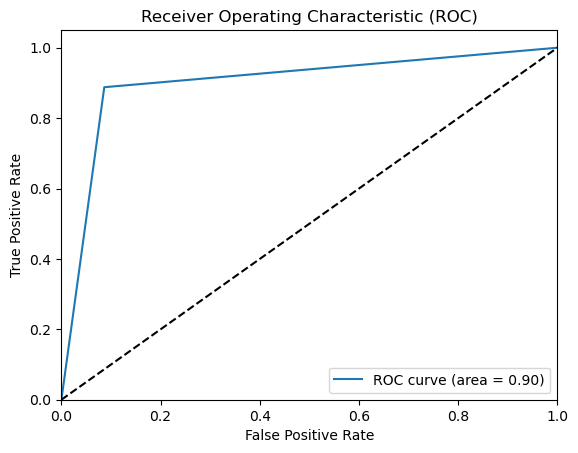

In [25]:
eval_model('smt', X_train_stand,y_train_sm, X_valid_stand, y_val, 50, 500, 'sqrt')

---------------model with n_trees: 50 , min_samples_leaf: 500 , max_features: sqrt
################ evaluation ################
------------------------------ score: 0.2980404831560255
------------------------------ confusion matrix: 
[[491099  47339]
 [    89    960]]


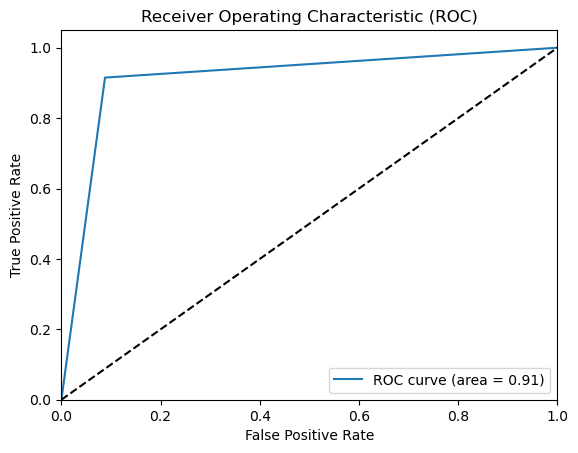

In [27]:
eval_model('smt', X_train_stand,y_train_sm, X_test_stand, y_test, 50, 500, 'sqrt')

---------------model with n_trees: 50 , min_samples_leaf: 500 , max_features: sqrt
################ evaluation ################
------------------------------ score: 0.29070322134620685
------------------------------ confusion matrix: 
[[494014  44424]
 [    80    969]]


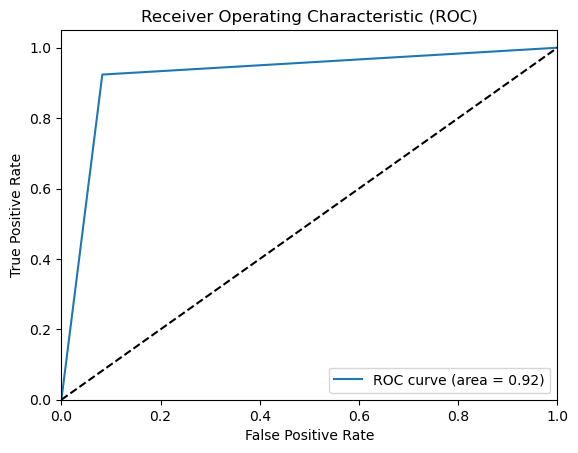

In [28]:
eval_model('smt', X_train_stand_tv,y_train_sm_tv, X_test_stand_tv, y_test_tv, 50, 500, 'sqrt')